# Actual Win Totals for NFL Teams, 2022-2023 Season vs. 2021-2022 Season
## Plotting to see which teams improved and which worsened

In [1]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Read in the data
df = pd.read_csv('data.csv')
df.head()

,Team,Expected23,Actual23,HalfTies23,Actual22,HalfTies22
0,ARI,8.5,4,4.0,11,11.0
1,ATL,4.5,7,7.0,7,7.0
2,BAL,10.5,10,10.0,8,8.0
3,BUF,11.5,13,13.0,11,11.0
4,CAR,6.5,7,7.0,5,5.0


In [3]:
# Create a path variable leading to the path for each logo file
df['path'] = 'logos2/' + df['Team'] + '.png'
df.head()

,Team,Expected23,Actual23,HalfTies23,Actual22,HalfTies22,path
0,ARI,8.5,4,4.0,11,11.0,logos2/ARI.png
1,ATL,4.5,7,7.0,7,7.0,logos2/ATL.png
2,BAL,10.5,10,10.0,8,8.0,logos2/BAL.png
3,BUF,11.5,13,13.0,11,11.0,logos2/BUF.png
4,CAR,6.5,7,7.0,5,5.0,logos2/CAR.png


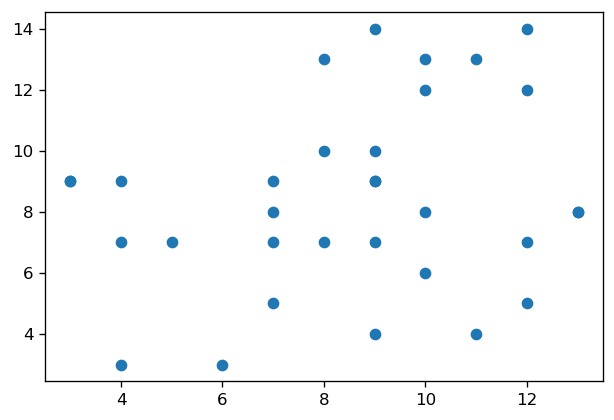

In [4]:
# Plot a simple scatter plot to ensure that our data looks correct
fig, ax = plt.subplots(figsize = (6, 4), dpi = 120)
ax.scatter(df['Actual22'], df['Actual23'])

In [5]:
# Write a function to pull the logo for each team and appropriately size it for plotting
def getImage(path):
    return OffsetImage(plt.imread(path), zoom = 0.038, alpha = 1)

Text(0.13, 0.855, 'Created by: Ethan Scheper')

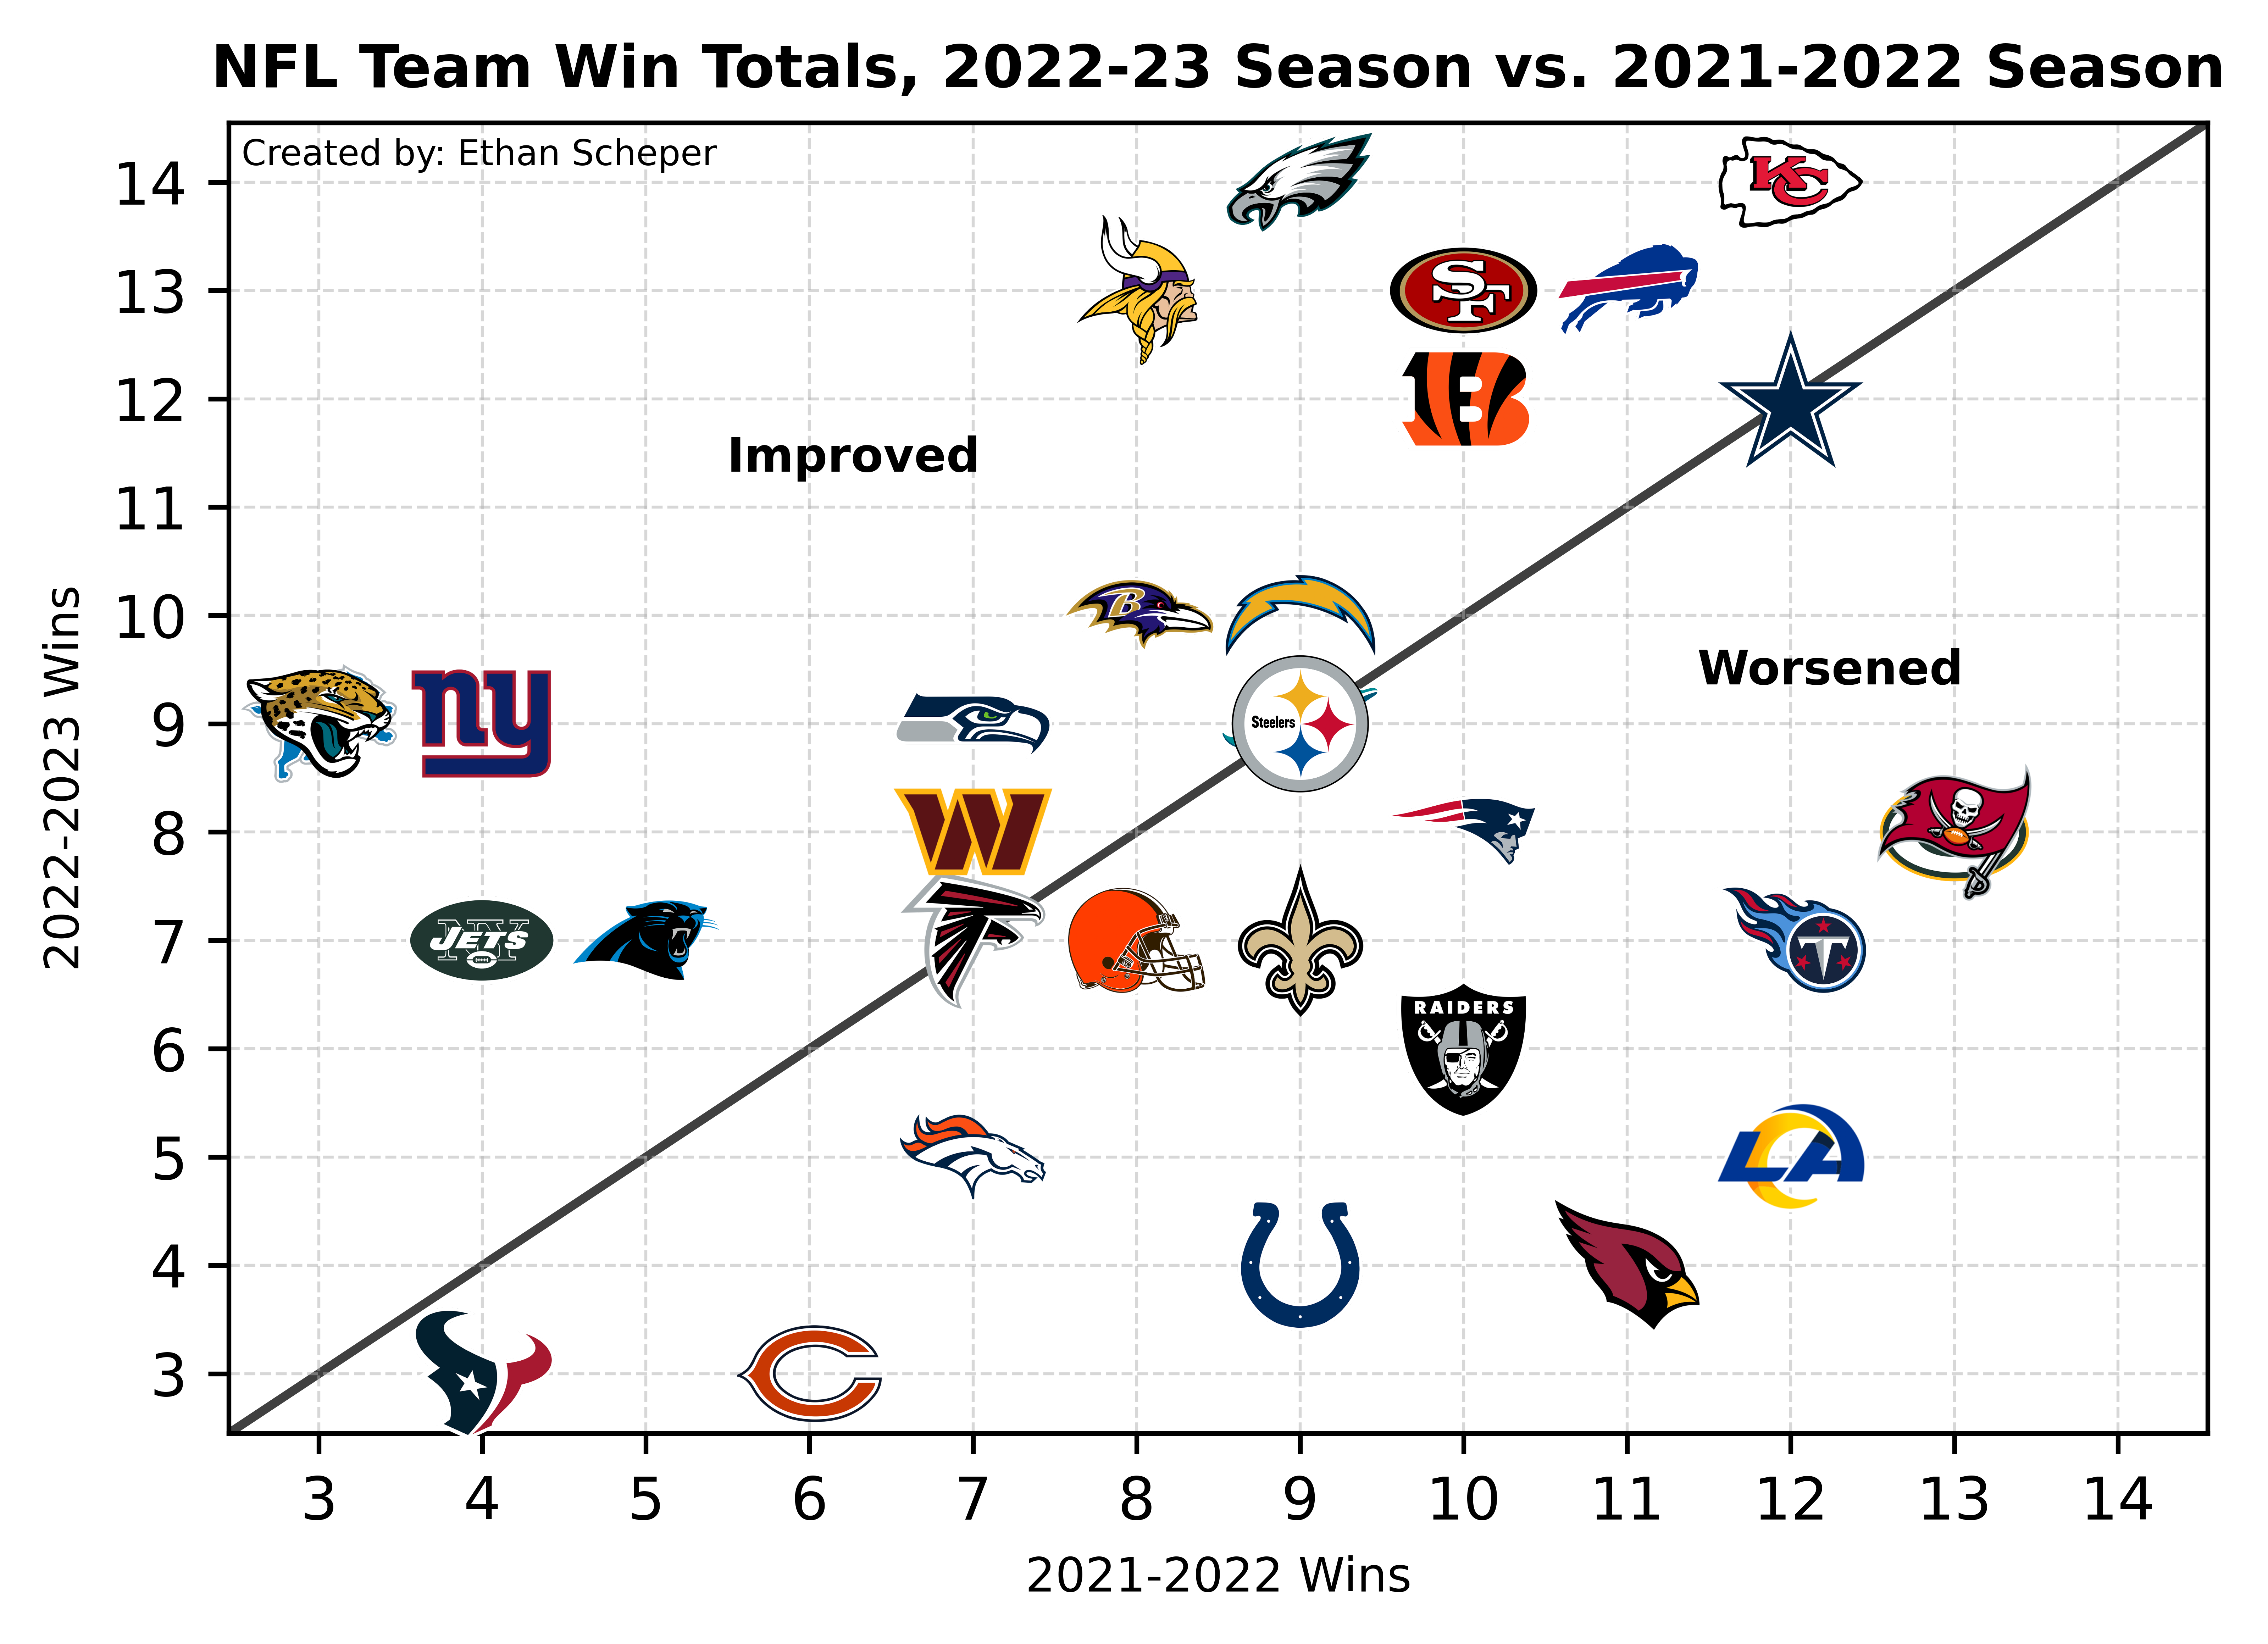

In [9]:
# Create a new scatter plot with the data points in white (essentially invisible) so they do not cover logos
fig, ax = plt.subplots(figsize = (6, 4), dpi = 1200)
ax.scatter(df['Actual22'], df['Actual23'], color = 'white')

# Loop through each team and plot their logo at the correct data point
for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['Actual22'], row['Actual23']), frameon = False)
    ax.add_artist(ab)

# Add a y=x line to show expectations, first by getting the axis limits
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# And then by plotting both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_xlim(lims)
ax.set_ylim(lims)

# Change the axis ticks to be every game instead of every 2 games
ax.xaxis.set(ticks = range(3, 15))
ax.yaxis.set(ticks = range(3, 15))

# Add gridlines for readability
ax.grid(linestyle = '--', linewidth = 0.5, alpha = 0.5)

# Add title and axis labels
ax.set_title('NFL Team Win Totals, 2022-23 Season vs. 2021-2022 Season', size = 10, weight = 'bold')
ax.set_xlabel('2021-2022 Wins', size = 8)
ax.set_ylabel('2022-2023 Wins', size = 8)

# Add miscellaneous text
fig.text(0.32, 0.675, 'Improved', size = 8, weight = 'bold')
fig.text(0.70, 0.55, 'Worsened', size = 8, weight = 'bold')
fig.text(0.13, 0.855, 'Created by: Ethan Scheper', size = 6)

In [ ]:
# Fix problem with overlapping logos

In [ ]:
# Export image